## Quantifying fluorescence in Leica `.lif` files using ROI files

The purpose of this notebook is to allow a user to extract `normalised total fluorescence intensity` from a region of images that have undergone `maximum intensity projection`.

### The `.lif` file container format

Leica `.lif` files are a many image container format. a `.lif` contains many `Series` which in turn have many `z-stacks`. The `Series` can be thought of as differing in their `x` and `y` co-ordinates, (so are pictures of different things or plates). Whereas the `z-stack` can be thought of as the `z` axis and makes up slices through the thing being observed under the objective.

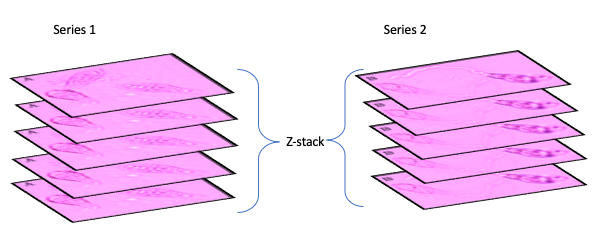

### Maximum Intensity Projection

A `max projection` is a way of collapsing the `z-stack` to create a single representative image. For each column of image pixels in the stack, the brightest is retained and passed into a final 'projected' image. 
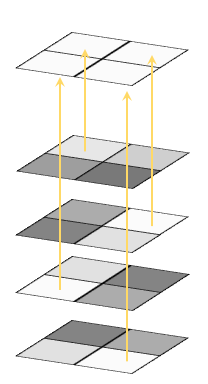


### Image Intensity Normalisation 

The images from the `.lif` file are converted from raw data to a scaled value. The scale for each collapsed image ranges from `0` to `255`. The total sum of all pixel values in a region of interest is reported.


Cell image from `Bannach Reis, Karinna & De Carvalho Barros Côrtes, M.V. & Martins, Frederico & Filippi, Marta & Realino de Paula, José & Conceição, Edemilson. (2015). Characterization of rue extract and its potential for controlling rice blast. Pesquisa Agropecuária Brasileira. 50. 1121-1130. 10.1590/S0100-204X2015001200001. `

### 1. Setting up the run folder

Put a _single_ `.lif` and the ROI `.zip` files into a single folder. This will be the run folder. 

Run the code below and select the run folder using the file browser that appears.

In [1]:
import fluorseg as fs

f = fs.FileBrowser()
f.widget()


### 2. Extracting the fluorescence data

Run the code below to get the fluorescence data out of the `.lif` files.

(This step can take a few minutes)

In [3]:
run_folder = f.path
result = fs.extract_volumes_for_rois(run_folder)



### 3. Saving the numbers to a `.csv` and a report summary page.

Run the code below to get the data into `.csv` format called `result.csv` and an image section summary. These files will be written to the same folder selected above.



In [4]:
import os
import csv

h = fs.HtmlReport(result)
html_file = os.path.join(run_folder, "report_summary.html" )
with open(html_file, "w") as outhtml:
    outhtml.write( h.write_html() )

csv_file = os.path.join(run_folder, "results.csv")
with open(csv_file, "w") as outcsv:
    csvw = csv.writer(outcsv)
    for row in fs.as_csv(result):
        csvw.writerow(row)


    